In [1]:
from keras.datasets import imdb #  imported imdb  data set from keras dataset
import pandas as pd   # import pandas 
import numpy as np # import numpy

Using TensorFlow backend.


In [2]:
type(imdb) # type of our data set 

module

In [3]:
(train_data,train_label),(test_data,test_label) = imdb.load_data(num_words = 10000) # our dataset is tuple form

In [36]:
print('Shape of train_data ',train_data.shape)
# print('Dimention of train_data',train_data.ndim)

Shape of train_data  (25000,)


In [38]:
print('Shape of train_label ',train_label.shape)
# print('Dimention of train_data',train_label.ndim)

Shape of train_label  (25000,)


In [39]:
print('Shape of test data ',test_data.shape)
# print('shape of test label',test_data.ndim)


Shape of test data  (25000,)


In [40]:
print('Shape of test data ',test_label.shape)
# print('shape of test label',test_label.ndim)


Shape of test data  (25000,)


In [8]:
def vectorize_sequences(sequences, dimension=10000):        # create a function that will return matrix of ourdate
    results = np.zeros((len(sequences), dimension))   # zero vector created, row: 25000 and columns: 10000
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.      # it will assignment 1s where 'i' w.r.t squence(alternative [232,2,443])
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [9]:
print('X train ',x_train.shape)
print('X test',x_test.shape)

X train  (25000, 10000)
X test (25000, 10000)


In [44]:
y_train = np.asarray(train_label).astype('float32')    
y_test = np.asarray(test_label).astype('float32')     

print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


### Architure of Neural Network

In [20]:
from keras import models   
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # 16 hidden layers
model.add(layers.Dense(16, activation='relu'))      # again densely conected 16 hidden layers
model.add(layers.Dense(1, activation='sigmoid')) # why 1 because of sigmoid function.

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Compilation of our model


In [21]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

### validation: unseen data for both test and training
- x--val start 0 to 10000 columns
- partial x train start 10000 to 25000 columns



In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
print(partial_x_train.shape)


(15000, 10000)


In [23]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
partial_y_train.shape

(15000,)

In [24]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 526us/step - loss: 0.5321 - accuracy: 0.7870 - val_loss: 0.4227 - val_accuracy: 0.8446
Epoch 2/20
15000/15000 [==============================] - 4s 252us/step - loss: 0.3327 - accuracy: 0.8965 - val_loss: 0.3275 - val_accuracy: 0.8783
Epoch 3/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.2423 - accuracy: 0.9217 - val_loss: 0.3064 - val_accuracy: 0.8783
Epoch 4/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.1928 - accuracy: 0.9361 - val_loss: 0.2763 - val_accuracy: 0.8890
Epoch 5/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.1551 - accuracy: 0.9513 - val_loss: 0.2824 - val_accuracy: 0.8850
Epoch 6/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1273 - accuracy: 0.9603 - val_loss: 0.2849 - val_accuracy: 0.8865
Epoch 7/20
15000/15000 [==============================] - 3s 

In [25]:
history_dic = history.history

In [26]:
type(history_dic)

dict

In [27]:
history_dic.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [28]:
import matplotlib.pyplot as plt

In [29]:
loss_values =  history_dic['loss']
val_loss_values = history_dic['val_loss']

In [30]:
epochs = range(1, len(loss_values) + 1)    # len(loss_values) : total 20 batch we run, it show each of loss in epoch

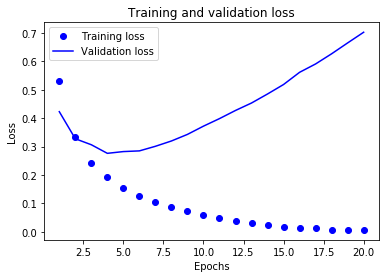

In [31]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

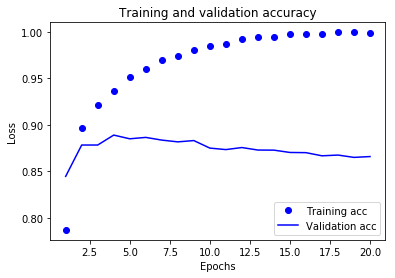

In [32]:
acc_values = history_dic['accuracy']
val_acc_values = history_dic['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
predict = model.predict(x_test)
predict.shape

(25000, 1)

In [79]:
test_label[9538]

0

In [77]:
np.argmax(predict[9999])

0

In [81]:
model.evaluate(x_test,y_test)   # first parameter is loss and second is accuracy

25000/25000 [==============================] - 6s 227us/step


[0.7722036863017082, 0.849839985370636]

## Loss is much high we reshape the structure of neural network

In [104]:
from keras import models   
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # 16 hidden layers
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))      # again densely conected 16 hidden layers
model.add(layers.Dropout(0.4))

model.add(layers.Dense(16, activation='relu'))      # again densely conected 16 hidden layers
model.add(layers.Dense(1, activation='sigmoid')) # why 1 because of sigmoid function.

In [105]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 642,689
Trainable params: 642,689
Non-trainable params: 0
________________________________________________

In [106]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [107]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 322us/step - loss: 0.1898 - accuracy: 0.7200 - val_loss: 0.1067 - val_accuracy: 0.8707
Epoch 2/20
15000/15000 [==============================] - 4s 260us/step - loss: 0.1059 - accuracy: 0.8679 - val_loss: 0.0931 - val_accuracy: 0.8753
Epoch 3/20
15000/15000 [==============================] - 4s 255us/step - loss: 0.0758 - accuracy: 0.9084 - val_loss: 0.0837 - val_accuracy: 0.8857
Epoch 4/20
15000/15000 [==============================] - 4s 272us/step - loss: 0.0573 - accuracy: 0.9299 - val_loss: 0.0859 - val_accuracy: 0.8864
Epoch 5/20
15000/15000 [==============================] - 4s 265us/step - loss: 0.0459 - accuracy: 0.9449 - val_loss: 0.0936 - val_accuracy: 0.8785
Epoch 6/20
15000/15000 [==============================] - 4s 257us/step - loss: 0.0356 - accuracy: 0.9580 - val_loss: 0.1253 - val_accuracy: 0.8495
Epoch 7/20
15000/15000 [==============================] - 4s 2

In [108]:
history_dic = history.history

In [109]:
history_dic.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

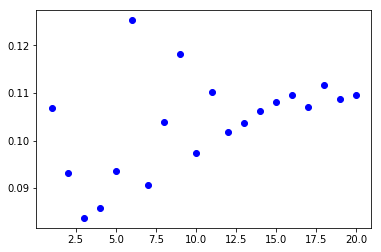

In [110]:
plt.plot(epochs,history_dic['val_loss'],'bo',label = 'Training Loss')

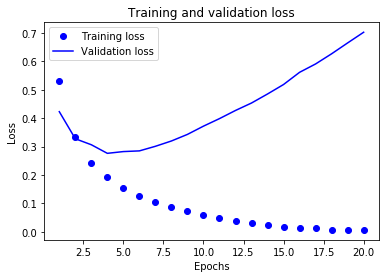

In [111]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

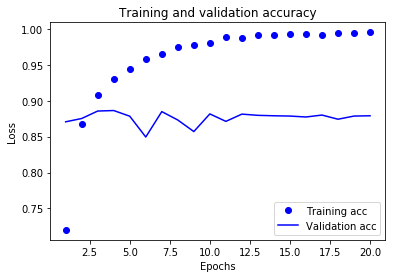

In [112]:
acc_values = history_dic['accuracy']
val_acc_values = history_dic['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [114]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 25s 1ms/step


[0.11724928714570763, 0.8696799874305725]

In [119]:
model.total_loss

<tf.Tensor 'Mean_6:0' shape=() dtype=float32>